# Task 3.1
Development of a classification model for discriminating between 2 classes: masses and calcification. Usage of at least one pre-trained state-of-the-art architecture.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import os
from google.colab import drive
import numpy as np

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
drive.mount('/content/drive')
os.listdir()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config', 'drive', 'sample_data']

In [0]:
base_dir = 'drive/My Drive/Computational Intelligence - MY PROJECT/My_Project_CompInt' 
os.listdir(base_dir)

['OldNotebooks',
 'Task 1',
 'Tensors',
 'Models',
 'Task4_RelevantPapers',
 'Task3.2_VGG16.ipynb',
 'Task4.ipynb',
 'Task5.ipynb',
 'Task2.1_With Data Aug.ipynb',
 'Task2.2.ipynb',
 'Task3.1_VGG16.ipynb',
 'Task 3.1_ INCEPTIONV3.ipynb']

In [0]:
#Restore the saved model
model = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task2.1_BaseVersion.h5'))

# Show the model architecture
model.summary()

# Getting the Data 

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images, train_labels, test_images, test_lable = load_training()




## Reshape

In [0]:
#reshape per poter fittare la CNN
# For Inception-v3, the input needs to be 299×299 RGB images,
train_images = train_images.reshape((5352, 150, 150,1))
train_images = train_images.astype('float32') / 65535

#adding channels
#b = tf.zeros([5352,150, 150, 1])
b = train_images
c = tf.concat([train_images, b], axis=3)
RGB_train_images_ToResize = tf.concat([c, b], axis=3)
RGB_train_images = tf.image.resize(RGB_train_images_ToResize, ( 299, 299))
print(RGB_train_images.shape)



test_images = test_images.reshape((672, 150, 150,1))
test_images = test_images.astype('float32') / 65535

#adding channels
#b = tf.zeros([672,150, 150, 1])
b = test_images
c = tf.concat([test_images, b], axis=3)
RGB_test_images_toResize = tf.concat([c, b], axis=3)
RGB_test_images = tf.image.resize(RGB_test_images_toResize, ( 299, 299))
print(RGB_test_images[0])





In [0]:
print(train_labels[0:100])

In [0]:
#Some check on size

#print("train_image[0]", train_images[3])


print("train_images shape:",RGB_train_images.shape)#just for check
print("train_images dim:",RGB_train_images.ndim)
print("train_images[0] shape:",RGB_train_images[0].shape)#just for check
print("train_images[0] dim:",RGB_train_images[0].ndim)
print("train_images dtype:",RGB_train_images.dtype)

print("lables:")



print("train_labels shape:",train_labels.shape)#just for check
print("train_labels dim:",train_labels.ndim)
print("train_labels[0] shape:",train_labels[0].shape)#just for check
print("train_labels[0] dim:",train_labels[0].ndim)
print("train_labels dtype:",train_labels.dtype)
print("train_labels[0]", train_labels[1])



##DATASet manipulation
In order to perform binary classification some manipulations must be done 

In [0]:
print(RGB_train_images[0:2])

## Deleting the baseline

In [0]:
#Here i manage the input tensors, removing the baseline patch and the relative labels in order to perform binary classification
SubTrainArray =  np.empty_like(RGB_train_images)
SubTrainArray =  np.delete(RGB_train_images, np.s_[::2], 0)

SubLabelArray = np.empty_like(train_labels)
SubLabelArray =  np.delete(train_labels, np.s_[::2], 0)


In [0]:
print(SubLabelArray[0:1000])
print(SubLabelArray[1000:2000])



## Editing the label 

In [0]:
#Here i manage the input tensor and the label in order to perform binary classification

leng = len(SubLabelArray)
SubLabelArray_Binary = np.empty_like(SubLabelArray)
for i in range(leng):
    if SubLabelArray[i] == 1 or SubLabelArray[i] == 2 :
      SubLabelArray_Binary[i] = 0
    if SubLabelArray[i] == 3 or SubLabelArray[i] == 4:
      SubLabelArray_Binary[i] = 1

print(SubLabelArray_Binary[0:1000])
print(SubLabelArray_Binary[2000:])


## Shuffle

In [0]:
#eseguo uno shuffle dei dati 
 from sklearn.utils import shuffle

 SubTrainArray_Shuffled, SubLabelArray_Shuffled = shuffle( SubTrainArray, SubLabelArray_Binary, random_state=42)



In [0]:
#Printing in order to check if the shuffled has been performed well
print(SubLabelArray_Shuffled[0:1000])
print(SubLabelArray_Shuffled[2000:3000])


## Modifiyng the test set

### Deleting BaseLine

In [0]:
#Here i manage the TEST data set, removing baseline
SubTestArray =  np.empty_like(RGB_test_images)
SubTestArray =  np.delete(RGB_test_images, np.s_[::2], 0)

SubTestLabelArray = np.empty_like(test_lable)
SubTestLabelArray =  np.delete(test_lable, np.s_[::2], 0)
print(SubTestLabelArray[0:1000])
print(SubTestArray.shape)

[2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 2 2 1 2 2 1 1 1 1 2 2 1 1 1 1 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 4 3 3 3 3
 3 3 4 3 3 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 3 3 4 4 3 3 4 4 4 4 4 4
 4 3 3 3 3 4 4 4 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 4 4 3 3 3 3 4 3 3 4 4 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 3 3 3 3 3 3 3
 3 3 3]
(336, 299, 299, 3)


### Editing the labels 

In [0]:
#Here i modify the label
SubTestLabelArray_Edited = np.zeros_like(SubTestLabelArray)

leng = len(SubTestLabelArray)
for i in range(leng):
    if SubTestLabelArray[i] == 1 or SubTestLabelArray[i] == 2 :
      SubTestLabelArray_Edited[i] = 0
    if SubTestLabelArray[i] == 3 or SubTestLabelArray[i] == 4:
      SubTestLabelArray_Edited[i] = 1

print(SubTestLabelArray_Edited[0:1000])


# First Version: Using INCEPTION v3 
The InceptionV340 model has been developed by Google and is also known as GoogleNet. The computational cost and memory requirement of the Inception network is much lower than VGG and ResNet50, which makes it a prominent network to be used in Big Data scenarios. The Inception network consists of a collection of Inception modules, each of which uses sets of 
3
×
3
 kernels to represent larger kernels in a computationally efficient manner. The network implemented here has five convolutional layers, each followed by a BN layer, 2 pooling layers, and 11 inception modules

## Importing INCEPTION


In [0]:
from tensorflow.keras.applications import InceptionV3

conv_InceptionV3 = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape = (299,299,3)) 
#INCEPTION a differenza di VGG16 non è flessibile riguardo allo shape in input e richiede che sia 299x299 a 3 canali



In [0]:
conv_InceptionV3.summary()

## Freezing the INCEPTION layers


In [0]:
conv_InceptionV3.trainable = False

## Adding my NET: Dropout VERSION

Using the
same learning rate for all layers may destroy the features that are already learned in the bottom
layers. To prevent this, a 3-stage training strategy was proposed which freezes the parameter learning
for all but the final layer and progressively unfreezes parameter learning from top to bottom, while
simultaneously decreasing the learning rate. The 3-stage training strategy on the S10 patch set was as
follows:
1. Set learning rate to 1e-3 and train the last layer for 3 epochs.
2. Set learning rate to 1e-4, unfreeze the top layers and train for 10 epochs, where the top layer
number is set to 46 for Resnet50 and 11 for VGG16.
3. Set learning rate to 1e-5, unfreeze all layers and train for 37 epochs for a total of 50 epochs.


#### Define the model

In [0]:
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models

model_DropOut = models.Sequential()

model_DropOut.add(conv_InceptionV3)
model_DropOut.add(layers.Flatten())
model_DropOut.add(layers.Dense(1024,activation='relu'))
model_DropOut.add(layers.Dropout(0.3))
model_DropOut.add(layers.Dense(512,activation='relu'))
model_DropOut.add(layers.Dense(1, activation='sigmoid'))



In [0]:
model_DropOut.summary()#a summary of the architecture

### unfreezing TOP layers

Decido quali layer rendere trainabili

In [0]:
conv_InceptionV3.trainable = True

set_trainable = False
for layer in conv_InceptionV3.layers:
    if layer.name == 'xxx' :#se metto un nome che non esiste, li blocco tutti
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = True

In [0]:
for layer in conv_InceptionV3.layers:
    if layer.trainable == True :
        print(layer.name)


Guardo quanti layer sono trainabili


In [0]:
print('This is the number of trainable weights ', len(model_DropOut.trainable_weights))

This is the number of trainable weights  6


In [0]:
model_DropOut.summary()

##Compilazione LR normale

In [0]:
model_DropOut.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=5)


In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=5)

## CrossValidation

This is the number of trainable weights  6
processing fold # 0
Train on 2409 samples, validate on 267 samples
Epoch 1/30
2409/2409 [==============================] - 15s 6ms/sample - loss: 6.0761 - binary_accuracy: 0.6335 - val_loss: 0.9316 - val_binary_accuracy: 0.5955
Epoch 2/30
2409/2409 [==============================] - 8s 3ms/sample - loss: 1.1732 - binary_accuracy: 0.7252 - val_loss: 0.5791 - val_binary_accuracy: 0.7303
Epoch 3/30
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.7736 - binary_accuracy: 0.7767 - val_loss: 1.1641 - val_binary_accuracy: 0.5393
Epoch 4/30
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.5972 - binary_accuracy: 0.7908 - val_loss: 0.6654 - val_binary_accuracy: 0.7154
Epoch 5/30
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.5262 - binary_accuracy: 0.8244 - val_loss: 0.6755 - val_binary_accuracy: 0.6217
Epoch 6/30
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.4201 - bi

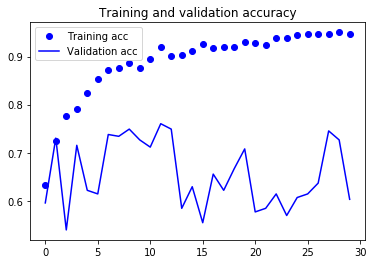

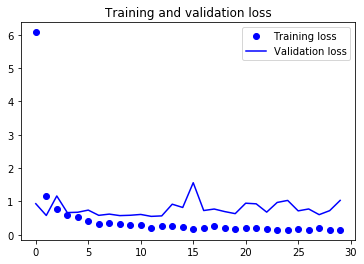

processing fold # 1
Train on 2409 samples, validate on 267 samples
Epoch 1/30
  32/2409 [..............................] - ETA: 16:05WARNING:tensorflow:Early stopping conditioned on metric `binary_accuracy` which is not available. Available metrics are: 


ResourceExhaustedError: ignored

In [0]:
#cross-validation, SUL TRAINING ESTRATTO e shuffled
import numpy as np
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
def get_model():
  Cross_model_ = models.Sequential()
  Cross_model_.add(conv_InceptionV3)
  Cross_model_.add(layers.Flatten())
  Cross_model_.add(layers.Dense(1024, activation='relu'))
  Cross_model_.add(layers.Dropout(0.3))
  Cross_model_.add(layers.Dense(512, activation='relu'))
  Cross_model_.add(layers.Dense(1, activation='sigmoid'))
  return Cross_model_

def plot():
  acc = history.history['binary_accuracy']
  val_acc = history.history['val_binary_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  return

k = 10
num_val_samples = len(SubTrainArray_Shuffled) // k
num_epochs = 30

Cross_model_DropOut = get_model()
Cross_model_DropOut.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['binary_accuracy'])
print('This is the number of trainable weights ', len(Cross_model_DropOut.trainable_weights))
for i in range(k):
  print('processing fold #', i)
  val_data = SubTrainArray_Shuffled[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = SubLabelArray_Shuffled[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([SubTrainArray_Shuffled[:i * num_val_samples],SubTrainArray_Shuffled[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([SubLabelArray_Shuffled[:i * num_val_samples],SubLabelArray_Shuffled[(i + 1) * num_val_samples:]],axis=0)
  history = Cross_model_DropOut.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets), epochs=num_epochs,callbacks=[callback], batch_size=32)
  Cross_model_DropOut = get_model()
  Cross_model_DropOut.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['binary_accuracy'])
  plot()



### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_DropOut.evaluate(SubTestArray, SubTestLabelArray_Edited, verbose= 1)
print(test_loss)
print(test_acc)

### Plotting

In [0]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## FITTING COMPLETO 
Dopo la cross validation, fitto su tutto il DATASET

In [0]:
 history = model_DropOut.fit(SubTrainArray_Shuffled, SubLabelArray_Shuffled, epochs=1,callbacks=[callback], batch_size=32)


Train on 2676 samples
2676/2676 [==============================] - 8s 3ms/sample - loss: 0.1388 - binary_accuracy: 0.9544


### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_DropOut.evaluate(SubTestArray, SubTestLabelArray_Edited, verbose= 1)
print(test_loss)
print(test_acc)

336/336 [==============================] - 1s 3ms/sample - loss: 0.6356 - binary_accuracy: 0.7619
0.6355813713300795
0.7619048


# Building The Network: Adding Data Aumentation

## Importing INCEPTION


In [0]:
from tensorflow.keras.applications import InceptionV3

conv_InceptionV3 = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape = (299,299,3)) 
#INCEPTION a differenza di VGG16 non è flessibile riguardo allo shape in input e richiede che sia 299x299 a 3 canali



In [0]:
conv_InceptionV3.summary()

## Freezing the INCEPTION layers


In [0]:
conv_InceptionV3.trainable = False

### Define The model

In [0]:
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models

model_Augmented = models.Sequential()

model_Augmented.add(conv_InceptionV3)
model_Augmented.add(layers.Flatten())
model_Augmented.add(layers.Dense(1024,activation='relu'))
model_Augmented.add(layers.Dropout(0.3))
model_Augmented.add(layers.Dense(512,activation='relu'))
model_Augmented.add(layers.Dense(1, activation='sigmoid'))

In [0]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model_Augmented.trainable_weights))

This is the number of trainable weights after freezing the conv base: 6


## Getting Augmented Data

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images_Augmented, train_labels_Augmented, test_images_Augmented, test_lable_Augmented = load_training()





In [0]:
#reshape per poter fittare la CNN
train_images_Augmented = train_images_Augmented.reshape((5352, 150, 150,1))



#adding channels
b = train_images_Augmented #tf.zeros([5352,150, 150, 1])
c = tf.concat([train_images_Augmented, b], axis=3)
RGB_train_images_Augmented_toResize = tf.concat([c, b], axis=3)
RGB_train_images_Augmented = tf.image.resize(RGB_train_images_Augmented_toResize, ( 299, 299))
print(RGB_train_images_Augmented.shape)



test_images_Augmented = test_images_Augmented.reshape((672, 150, 150,1))

#adding channels
b = test_images_Augmented#tf.zeros([672,150, 150, 1])
c = tf.concat([test_images_Augmented, b], axis=3)
RGB_test_images_Augmented_toResize = tf.concat([c, b], axis=3)
RGB_test_images_Augmented = tf.image.resize(RGB_test_images_Augmented_toResize, ( 299, 299))
print(RGB_test_images_Augmented[0])






(5352, 299, 299, 3)
tf.Tensor(
[[[41464.    41464.    41464.   ]
  [41490.51  41490.51  41490.51 ]
  [41543.188 41543.188 41543.188]
  ...
  [36499.277 36499.277 36499.277]
  [36014.168 36014.168 36014.168]
  [35770.    35770.    35770.   ]]

 [[41373.6   41373.6   41373.6  ]
  [41396.098 41396.098 41396.098]
  [41440.793 41440.793 41440.793]
  ...
  [36332.008 36332.008 36332.008]
  [35852.348 35852.348 35852.348]
  [35610.918 35610.918 35610.918]]

 [[41194.004 41194.004 41194.004]
  [41208.52  41208.52  41208.52 ]
  [41237.36  41237.36  41237.36 ]
  ...
  [35999.688 35999.688 35999.688]
  [35530.848 35530.848 35530.848]
  [35294.867 35294.867 35294.867]]

 ...

 [[43943.    43943.    43943.   ]
  [43968.12  43968.12  43968.12 ]
  [44018.03  44018.03  44018.03 ]
  ...
  [36508.52  36508.52  36508.52 ]
  [36441.664 36441.664 36441.664]
  [36408.016 36408.016 36408.016]]

 [[43943.    43943.    43943.   ]
  [43976.1   43976.1   43976.1  ]
  [44041.867 44041.867 44041.867]
  ...
  [3608

### Deleting the baseline

In [0]:
#Here i manage the input tensors, removing the baseline patch and the relative labels in order to perform binary classification
SubTrainArray_AG =  np.empty_like(RGB_train_images_Augmented)
SubTrainArray_AG  =  np.delete(RGB_train_images_Augmented, np.s_[::2], 0)
print(SubTrainArray_AG[1])
SubLabelArray_AG  = np.empty_like(train_labels_Augmented)
SubLabelArray_AG  =  np.delete(train_labels_Augmented, np.s_[::2], 0)
print(SubLabelArray_AG[0:100])


[[[38970.    38970.    38970.   ]
  [38664.21  38664.21  38664.21 ]
  [38056.688 38056.688 38056.688]
  ...
  [37928.37  37928.37  37928.37 ]
  [38094.42  38094.42  38094.42 ]
  [38178.    38178.    38178.   ]]

 [[38731.13  38731.13  38731.13 ]
  [38522.19  38522.19  38522.19 ]
  [38107.09  38107.09  38107.09 ]
  ...
  [38173.36  38173.36  38173.36 ]
  [38294.695 38294.695 38294.695]
  [38355.766 38355.766 38355.766]]

 [[38256.547 38256.547 38256.547]
  [38240.03  38240.03  38240.03 ]
  [38207.223 38207.223 38207.223]
  ...
  [38660.09  38660.09  38660.09 ]
  [38692.586 38692.586 38692.586]
  [38708.94  38708.94  38708.94 ]]

 ...

 [[33249.055 33249.055 33249.055]
  [33138.36  33138.36  33138.36 ]
  [32918.438 32918.438 32918.438]
  ...
  [35070.844 35070.844 35070.844]
  [34294.215 34294.215 34294.215]
  [33903.312 33903.312 33903.312]]

 [[32851.234 32851.234 32851.234]
  [32866.074 32866.074 32866.074]
  [32895.56  32895.56  32895.56 ]
  ...
  [34824.473 34824.473 34824.473]
  [3

### Editing the label 

In [0]:
#Here i manage the input tensor and the label in order to perform binary classification

leng = len(SubLabelArray_AG)
SubLabelArray_Binary_AG = np.empty_like(SubLabelArray_AG)
for i in range(leng):
    if SubLabelArray_AG[i] == 1 or SubLabelArray_AG[i] == 2 :
      SubLabelArray_Binary_AG[i] = 0
    if SubLabelArray_AG[i] == 3 or SubLabelArray_AG[i] == 4:
      SubLabelArray_Binary_AG[i] = 1

print(SubLabelArray_Binary_AG[0:1000])
print(SubLabelArray_Binary_AG[2000:])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Modifiyng the test set

### Deleting BaseLine

In [0]:
#Here i manage the TEST data set, removing baseline
SubTestArray_Augmented =  np.empty_like(RGB_test_images_Augmented)
SubTestArray_Augmented =  np.delete(RGB_test_images_Augmented, np.s_[::2], 0)

SubTestLabelArray_Augmented = np.empty_like(test_lable_Augmented)
SubTestLabelArray_Augmented =  np.delete(test_lable_Augmented, np.s_[::2], 0)
print(SubTestLabelArray_Augmented[0:1000])
print(SubTestLabelArray_Augmented.shape)

[2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 2 2 1 2 2 1 1 1 1 2 2 1 1 1 1 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 4 3 3 3 3
 3 3 4 3 3 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 3 3 4 4 3 3 4 4 4 4 4 4
 4 3 3 3 3 4 4 4 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 4 4 3 3 3 3 4 3 3 4 4 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 3 3 3 3 3 3 3
 3 3 3]
(336,)


### Editing the labels 

In [0]:
#Here i modify the label
SubTestLabelArray_Augmented_Edited = np.zeros_like(SubTestLabelArray_Augmented)

leng = len(SubTestLabelArray_Augmented_Edited)
for i in range(leng):
    if SubTestLabelArray_Augmented[i] == 1 or SubTestLabelArray_Augmented[i] == 2 :
      SubTestLabelArray_Augmented_Edited[i] = 0
    if SubTestLabelArray_Augmented[i] == 3 or SubTestLabelArray_Augmented[i] == 4:
      SubTestLabelArray_Augmented_Edited[i] = 1

print(SubTestLabelArray_Augmented_Edited[0:1000])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


### Shuffle

In [0]:
#eseguo uno shuffle dei dati 
 from sklearn.utils import shuffle

 SubTrainArray_Shuffled_AG, SubLabelArray_Shuffled_AG = shuffle( SubTrainArray_AG, SubLabelArray_Binary_AG, random_state=42)



## Data Augmentation

In [0]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./65535,
      rotation_range=360,
      zoom_range=0.1, 
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./65535)
test_datagen = ImageDataGenerator(rescale=1./65535)

In [0]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_targets, val_targets = train_test_split(SubTrainArray_Shuffled_AG, SubLabelArray_Shuffled_AG, test_size=0.1, stratify=SubLabelArray_Binary_AG)
print(train_data.shape)

(2408, 299, 299, 3)


In [0]:


train_generator = train_datagen.flow(
        # This is the target directory
        train_data,
        train_targets,
        batch_size=32
        )

validation_generator = validation_datagen.flow(
        val_data,
        val_targets,
        batch_size=32)

test_generator = test_datagen.flow(
        SubTestArray_Augmented,
        SubTestLabelArray_Augmented_Edited,
        batch_size = 32
)

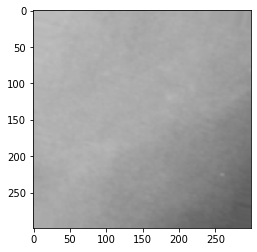

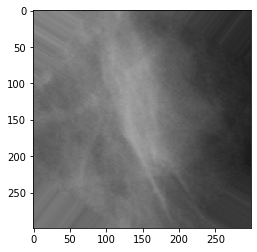

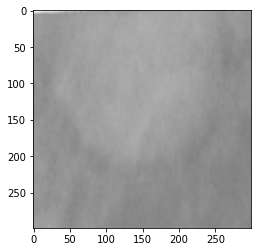

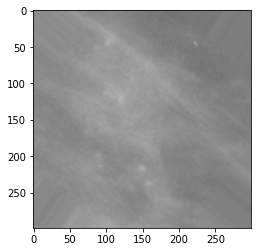

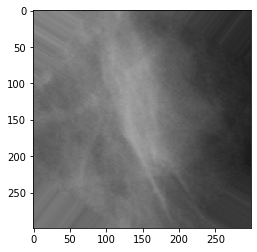

In [0]:
import matplotlib.pyplot as plt

augmented_images = [train_generator[0][0][0] for i in range(5)]
for data_batch, labels_batch in train_generator:
    plt.imshow(np.squeeze(data_batch[6]), cmap='Accent')
    plt.show()
    plt.imshow(np.squeeze(data_batch[2]), cmap='Greys')
    plt.show()
    plt.imshow(np.squeeze(data_batch[0]), cmap='Greys')
    plt.show()
    plt.imshow(np.squeeze(data_batch[1]), cmap='Greys')
    plt.show()
    plt.imshow(np.squeeze(data_batch[2]), cmap='Greys')
    plt.show()
    break

## Fitting with normal LR

In [0]:
model_Augmented.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=5)


In [0]:

history = model_Augmented.fit_generator(
      train_generator,
      steps_per_epoch=2408//32,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=268//32)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 8 steps
Epoch 1/50
75/75 [==============================] - 45s 602ms/step - loss: 5.6756 - binary_accuracy: 0.5880 - val_loss: 0.5037 - val_binary_accuracy: 0.7656
Epoch 2/50
75/75 [==============================] - 41s 548ms/step - loss: 1.2406 - binary_accuracy: 0.6604 - val_loss: 0.5411 - val_binary_accuracy: 0.7227
Epoch 3/50
75/75 [==============================] - 40s 539ms/step - loss: 0.7943 - binary_accuracy: 0.7130 - val_loss: 0.8598 - val_binary_accuracy: 0.5977
Epoch 4/50
75/75 [==============================] - 41s 542ms/step - loss: 0.7143 - binary_accuracy: 0.7239 - val_loss: 0.4868 - val_binary_accuracy: 0.7773
Epoch 5/50
75/75 [==============================] - 40s 537ms/step - loss: 0.6306 - binary_accuracy: 0.7635 - val_loss: 0.5572 - val_binary_accuracy: 0.7031
Epoch 6/50
75/75 [==============================

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_Augmented.evaluate_generator(test_generator, verbose= 1)
print(test_loss)
print(test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
11/11 [==============================] - 1s 85ms/step - loss: 0.4803 - binary_accuracy: 0.7857
0.48031917214393616
0.78571427


### Load OR Save the model

In [0]:
#Save the model!
model_DropOut.save(os.path.join(base_dir,'Models/Model_Task_2.1_WithAugmentatin_Definitivo_0.85.h5'))

In [0]:
#Restore the saved model
model_DropOut = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_2.1_WithDROPOUT.h5'))

# Show the model architecture
model_DropOut.summary()

### unfreezing TOP layers

In [0]:
conv_InceptionV3.trainable = True

set_trainable = False
for layer in conv_InceptionV3.layers:
    if layer.name == 'conv2d_76' :#se metto un nome che non esiste, li blocco tutti
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = True

In [0]:
for layer in conv_InceptionV3.layers:
    if layer.trainable == True :
        print(layer.name)


In [0]:
print('This is the number of trainable weights ', len(model_Augmented.trainable_weights))

This is the number of trainable weights  196


## Fitting with LOW LR

In [0]:
conv_InceptionV3.trainable = True

set_trainable = False
for layer in conv_InceptionV3.layers:
    if layer.name == 'mixed8':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
print('This is the number of trainable weights ', len(model_Augmented.trainable_weights))

This is the number of trainable weights  26


In [0]:
model_Augmented.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=5)


In [0]:

history = model_Augmented.fit_generator(
      train_generator,
      steps_per_epoch=2408//32,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=268//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 76 steps, validate for 9 steps
Epoch 1/50
76/76 [==============================] - 60s 785ms/step - loss: 0.3230 - binary_accuracy: 0.8638 - val_loss: 0.3564 - val_binary_accuracy: 0.8433
Epoch 2/50
76/76 [==============================] - 46s 602ms/step - loss: 0.3202 - binary_accuracy: 0.8667 - val_loss: 0.4530 - val_binary_accuracy: 0.7948
Epoch 3/50
76/76 [==============================] - 46s 603ms/step - loss: 0.3153 - binary_accuracy: 0.8617 - val_loss: 0.5431 - val_binary_accuracy: 0.7724
Epoch 4/50
76/76 [==============================] - 46s 603ms/step - loss: 0.2930 - binary_accuracy: 0.8758 - val_loss: 0.4864 - val_binary_accuracy: 0.7724
Epoch 5/50
76/76 [==============================] - 46s 606ms/step - loss: 0.3094 - binary_accuracy: 0.8679 - val_loss: 0.4723 - val_binary_accuracy: 0.7799
Epoch 6/50
76/76 [==============================] - 46s 601ms/step - loss: 0.2969 - binary_accuracy: 0.8783 - val_loss: 0.47

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_Augmented.evaluate_generator(test_generator, verbose= 1)
print(test_loss)
print(test_acc)

### Load OR Save the model

In [0]:
#Save the model!
model_Augmented.save(os.path.join(base_dir,'Models/Model_Task_3.1_Inception_WithAugmentatin_Definitivo_0.8839.h5'))